In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

<h1>Linear Damage</h1>

In [2]:
df = pd.read_csv('input/results_complete_linear.csv')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['damage'], axis=1), df['damage'], test_size=0.10, random_state=41)

In [4]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [5]:
%%time
path = 'models/linear_reg_pca'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(int(pca.n_components_))))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(1, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.summary()
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                1760      
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dense_2 (Dense)             (None, 80)                6480      
                                                                 
 dense_3 (Dense)             (None, 1)                 81        
                                                                 
Total params: 14,801
Trainable params: 14,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
726/726 [==============================] - 1s 1ms/step - loss: 1.0964 - val_loss: 0.2285
Epoch 2/1000
726/726 [==============================] - 1s 1ms/step - loss: 0.1943

INFO:tensorflow:Assets written to: models/linear_reg_pca\assets


INFO:tensorflow:Assets written to: models/linear_reg_pca\assets


CPU times: total: 4min 4s
Wall time: 14min 49s


In [6]:
pd.DataFrame(history.history).to_csv('output/history_mlp_linear_pca.csv')

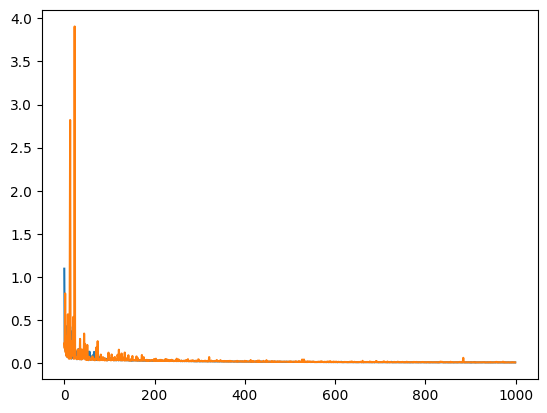

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

<h3>MAPE</h3>

In [8]:
pred = model.predict(X_test)

81/81 [==============================] - 0s 785us/step


In [9]:
mean_absolute_percentage_error(y_test, pred)

0.5747040377118585

<h3>R2</h3>

In [10]:
r2_score(y_test, pred)

0.8867017742796187

<h3>Cosine Similarity</h3>

In [11]:
print(np.dot(y_test.values, pred)/(np.linalg.norm(y_test.values)*np.linalg.norm(pred)))

[0.9857883]


<h3>Visualization</h3>

In [12]:
result = pd.DataFrame()
result['y'] = y_test.values
result['pred'] = pred
result = result.sort_values(by=['y']).reset_index(drop=True)
result.to_csv('output\\mlp_linear_pca_reg.csv', index=False)

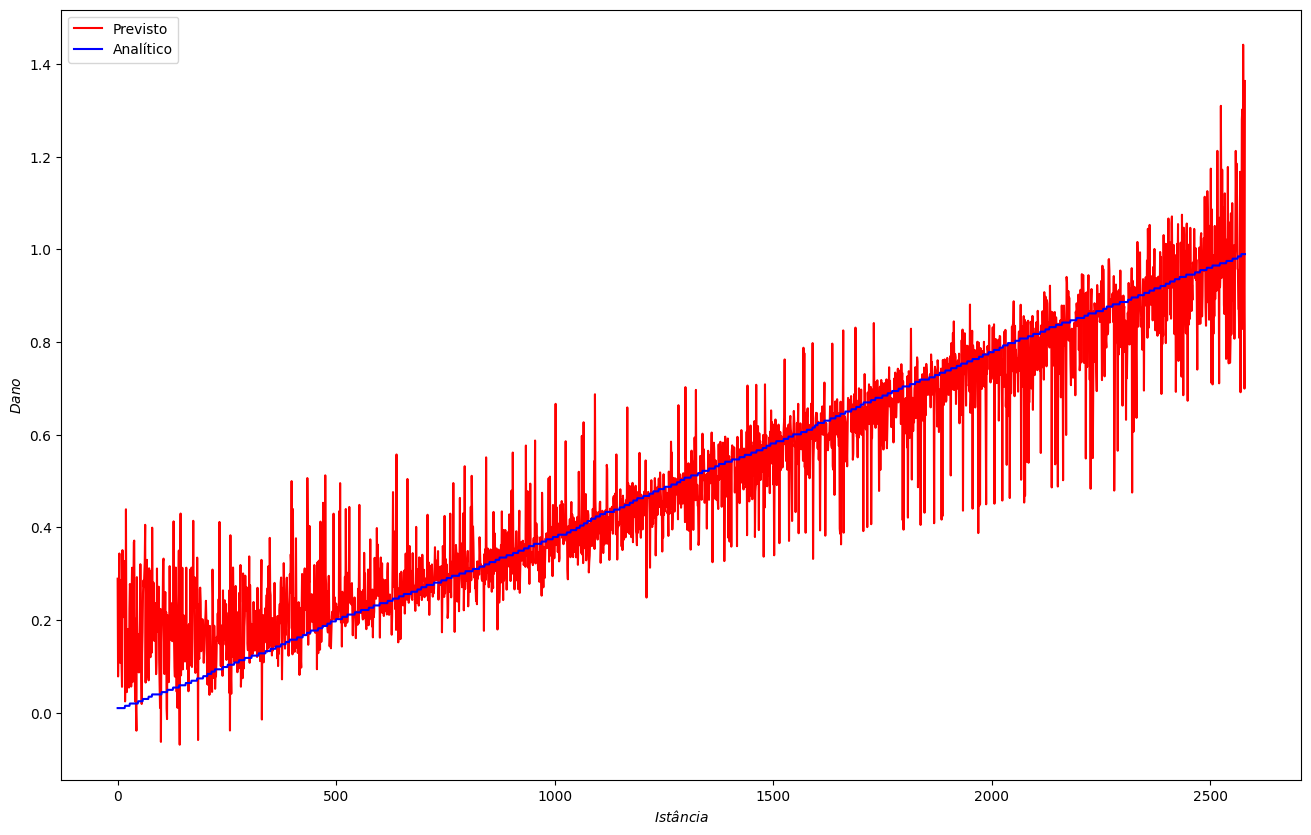

In [13]:
plt.figure(figsize=(16,10))
plt.plot(result['pred'], 'r')
plt.plot(result['y'], 'b')
plt.xlabel("$Istância$",)
plt.ylabel("$Dano$",)
plt.legend(['Previsto', 'Analítico'])
plt.show()

<h1>Exponential Damage</h1>

In [14]:
df_exp = pd.read_csv('input/results_complete_exponential.csv')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_exp.drop(['damage'], axis=1), df_exp['damage'], test_size=0.10, random_state=41)

In [16]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [17]:
%%time
path = 'models/exp_reg_pca'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(int(pca.n_components_))))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(1, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.summary()
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 80)                1680      
                                                                 
 dense_5 (Dense)             (None, 80)                6480      
                                                                 
 dense_6 (Dense)             (None, 80)                6480      
                                                                 
 dense_7 (Dense)             (None, 1)                 81        
                                                                 
Total params: 14,721
Trainable params: 14,721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
726/726 [==============================] - 1s 1ms/step - loss: 0.6503 - val_loss: 1.1497
Epoch 2/1000
726/726 [==============================] - 1s 1ms/step - loss: 0.23

INFO:tensorflow:Assets written to: models/exp_reg_pca\assets


INFO:tensorflow:Assets written to: models/exp_reg_pca\assets


CPU times: total: 4min 5s
Wall time: 13min 39s


In [18]:
pred = model.predict(X_test)

81/81 [==============================] - 0s 717us/step


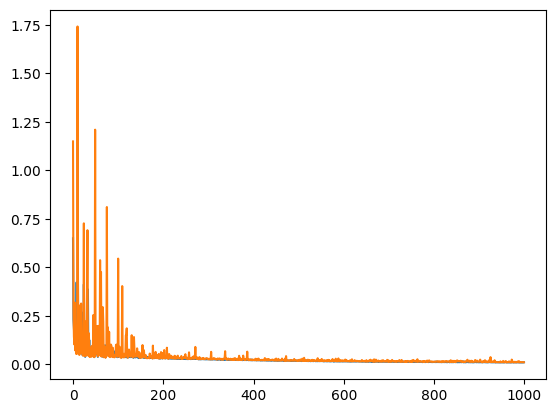

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

<h3>MAPE</h3>

In [20]:
mean_absolute_percentage_error(y_test, pred)

0.29864229312847723

<h3>R2</h3>

In [21]:
r2_score(y_test, pred)

0.8502350112371504

<h3>Cosine Similarity</h3>

In [22]:
print(np.dot(y_test.values, pred)/(np.linalg.norm(y_test.values)*np.linalg.norm(pred)))

[0.98965376]


<h3>Visualization</h3>

In [23]:
result = pd.DataFrame()
result['y'] = y_test.values
result['pred'] = pred
result = result.sort_values(by=['y']).reset_index(drop=True)
result.to_csv('output\\mlp_exp_pca_reg.csv', index=False)

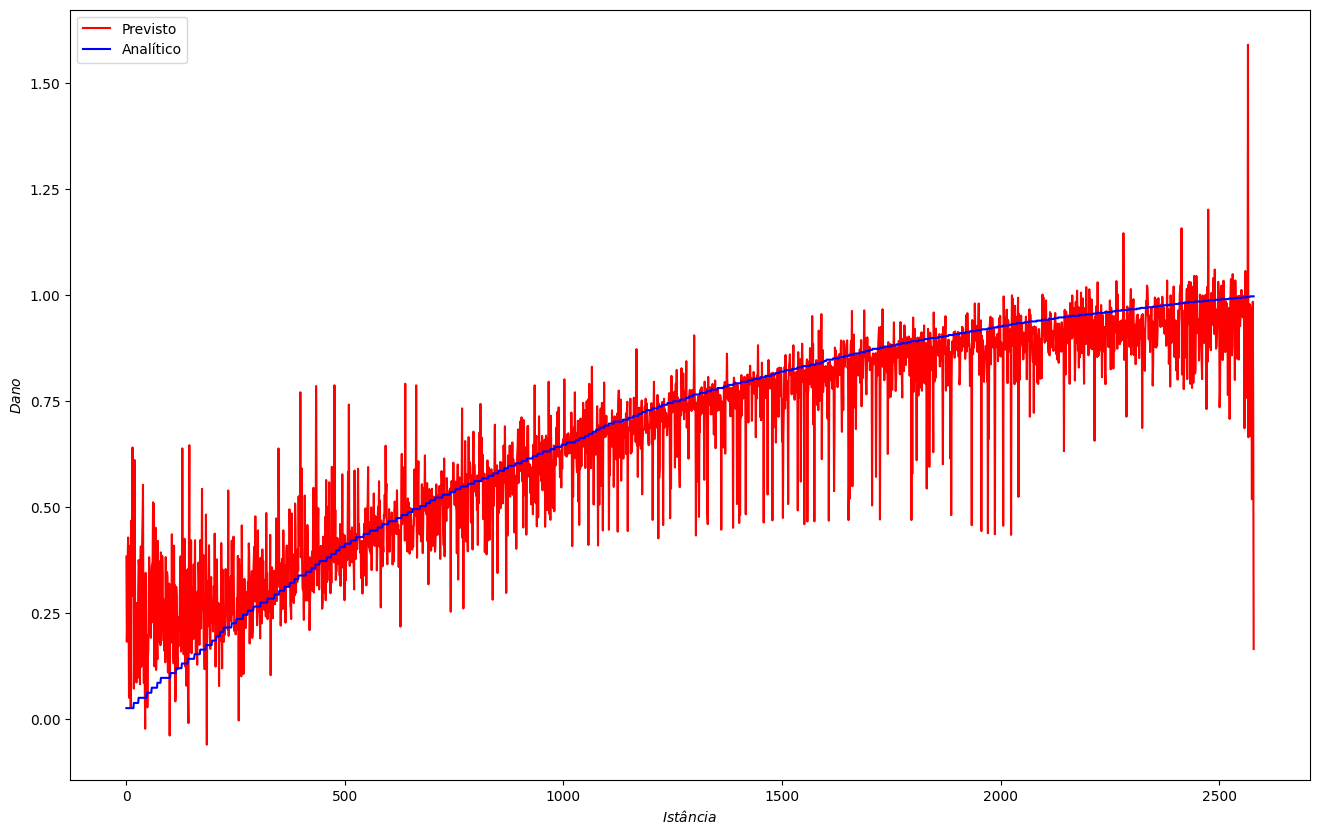

In [24]:
plt.figure(figsize=(16,10))
plt.plot(result['pred'], 'r')
plt.plot(result['y'], 'b')
plt.xlabel("$Istância$",)
plt.ylabel("$Dano$",)
plt.legend(['Previsto', 'Analítico'])
plt.show()

<h1>Sigmoid-like Damage</h1>

In [25]:
df_sig = pd.read_csv('input/results_complete_sigmoid_like.csv')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_sig.drop(['damage'], axis=1), df_sig['damage'], test_size=0.05, random_state=41)

In [27]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [28]:
%%time
path = 'models/sig_reg_pca'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(int(pca.n_components_))))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(1, activation=tf.keras.layers.LeakyReLU(alpha=0.5)))
    model.summary()
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 80)                1280      
                                                                 
 dense_9 (Dense)             (None, 80)                6480      
                                                                 
 dense_10 (Dense)            (None, 80)                6480      
                                                                 
 dense_11 (Dense)            (None, 1)                 81        
                                                                 
Total params: 14,321
Trainable params: 14,321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
766/766 [==============================] - 1s 1ms/step - loss: 2.1354 - val_loss: 0.2263
Epoch 2/1000
766/766 [==============================] - 1s 1ms/step - loss: 0.62

INFO:tensorflow:Assets written to: models/sig_reg_pca\assets


INFO:tensorflow:Assets written to: models/sig_reg_pca\assets


CPU times: total: 4min 11s
Wall time: 13min 58s


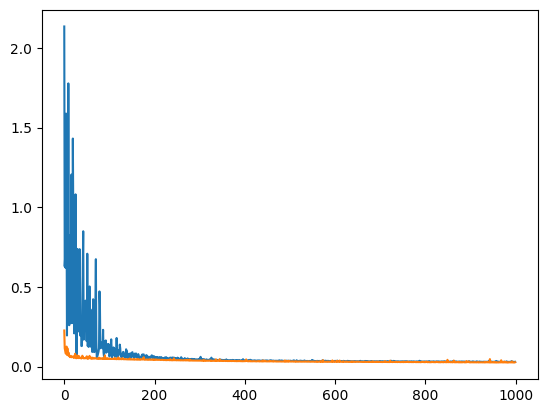

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [30]:
pred = model.predict(X_test)

41/41 [==============================] - 0s 844us/step


<h3>MAPE</h3>

In [31]:
mean_absolute_percentage_error(y_test, pred)

5.736836795765074

<h3>R2</h3>

In [32]:
r2_score(y_test, pred)

0.8115419228024993

<h3>Cosine Similarity</h3>

In [33]:
print(np.dot(y_test.values, pred)/(np.linalg.norm(y_test.values)*np.linalg.norm(pred)))

[0.96577567]


<h3>Visualization</h3>

In [34]:
result = pd.DataFrame()
result['y'] = y_test.values
result['pred'] = pred
result = result.sort_values(by=['y']).reset_index(drop=True)
result.to_csv('output\\mlp_sig_pca_reg.csv', index=False)

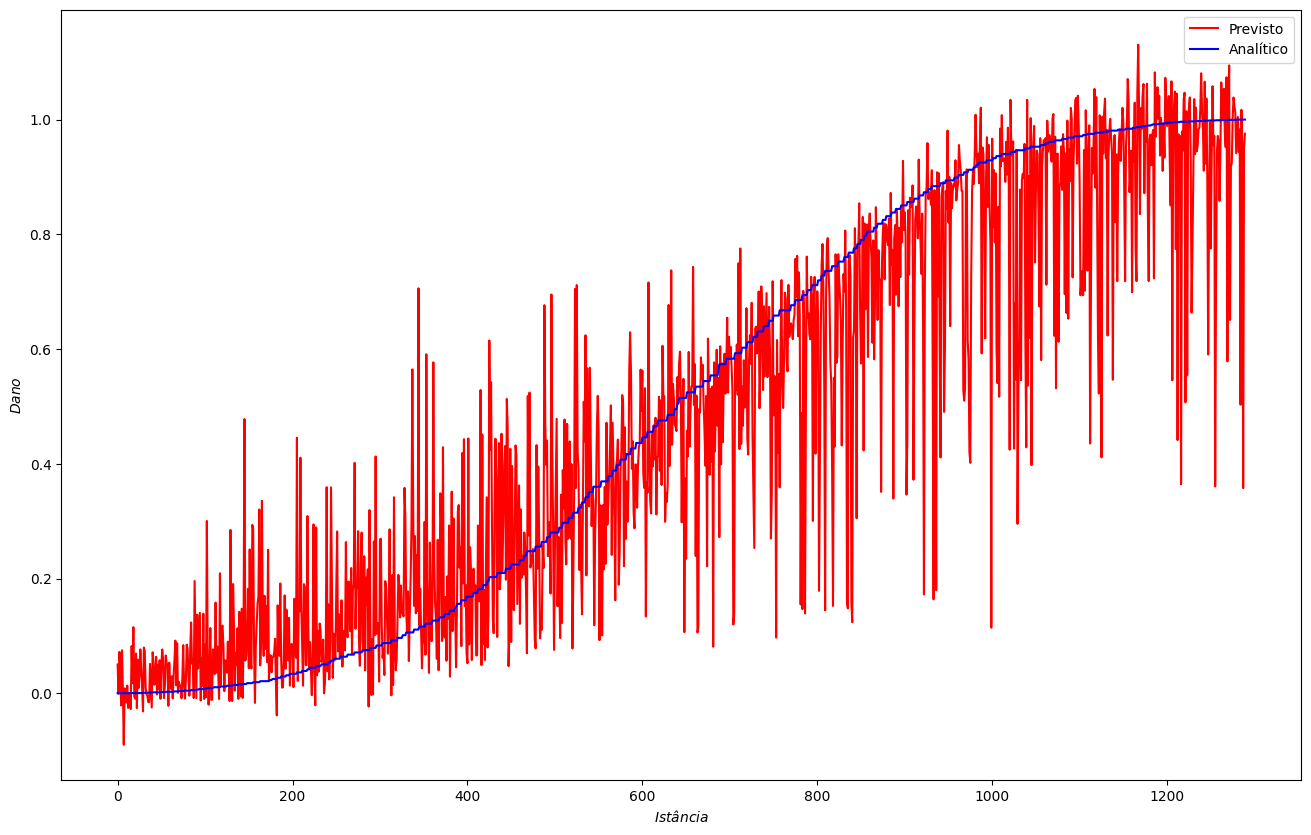

In [35]:
plt.figure(figsize=(16,10))
plt.plot(result['pred'], 'r')
plt.plot(result['y'], 'b')
plt.xlabel("$Istância$",)
plt.ylabel("$Dano$",)
plt.legend(['Previsto', 'Analítico'])
plt.show()